<a href="https://colab.research.google.com/github/tuyishimejohnson/group-7-sentiment-analysis/blob/main/Group_7_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB REVIEWS TEXT CLASSIFICATION SYSTEMS BASED ON SENTIMENT ANALYSIS



# **Data Preparation**

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## 1. Data Loading and Initial Exploration

- Load the IMDB reviews dataset.
- Display the first few entries, check the data types of columns, and get a sense of the data structure.



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


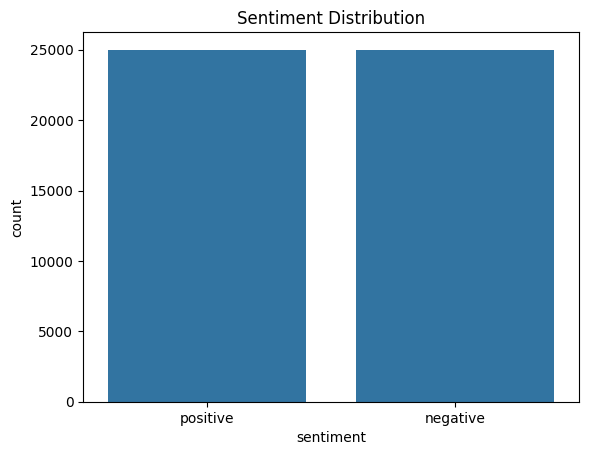

In [3]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics of the dataset
print(df.describe())

# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

## 2. Statistical Analysis of Reviews

Here, we delve deeper into the dataset's characteristics by analyzing the distribution of sentiment classes to check for balance and examining review lengths to understand the text volume we're dealing with.




sentiment
positive    25000
negative    25000
Name: count, dtype: int64


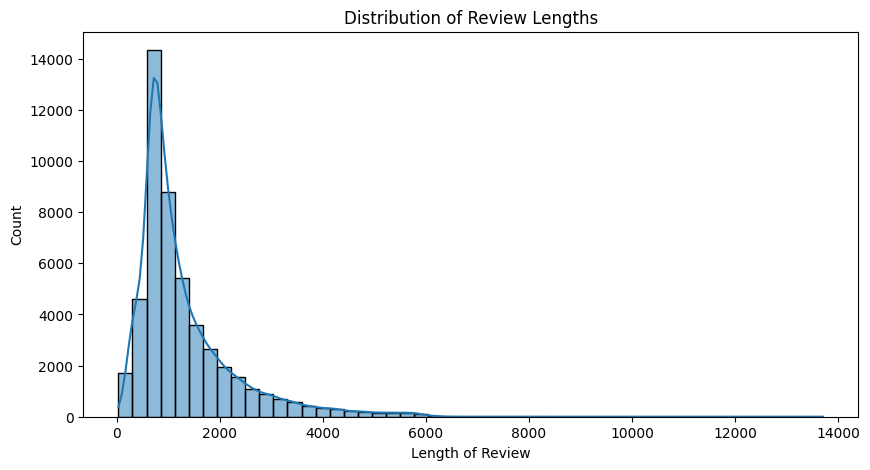

In [4]:
# Check for class imbalance
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Text length analysis
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.show()

## 3. Visualizations for Insight

We create word clouds to visualize the most frequent words associated with each sentiment, providing a qualitative look at text content that might indicate sentiment.



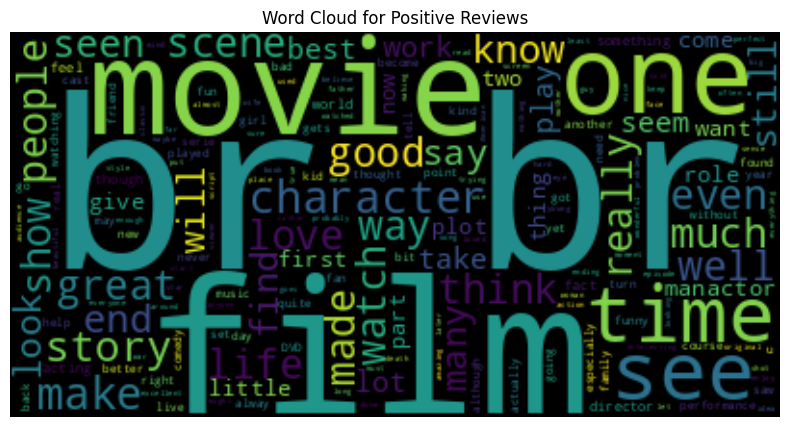

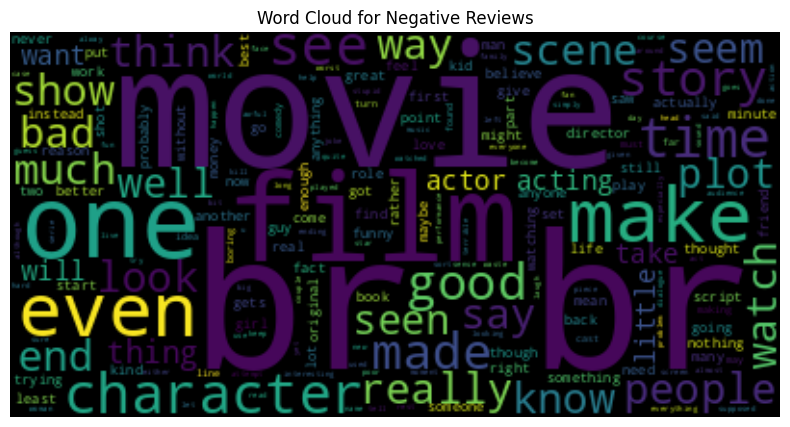

In [5]:
# Word Cloud for positive and negative sentiments
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])

# Positive reviews word cloud
wordcloud_positive = WordCloud().generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Negative reviews word cloud
wordcloud_negative = WordCloud().generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Reviews')
plt.show()

## 4. Text Preprocessing

This section focuses on normalizing and cleaning the text to prepare it for analysis. We convert text to lowercase, remove non-alphabetic characters, tokenize words, eliminate stopwords, and reduce words to their base form via lemmatization. This step is crucial to ensure our features are relevant.


Most common words after preprocessing: [('movie', 79092), ('film', 71775), ('one', 42231), ('like', 31774), ('time', 23520), ('good', 22795), ('character', 21990), ('story', 19467), ('get', 19424), ('even', 19361), ('would', 19222), ('make', 18875), ('see', 18776), ('really', 18285), ('scene', 16642), ('much', 15069), ('well', 14956), ('people', 14377), ('great', 14251), ('bad', 14193)]


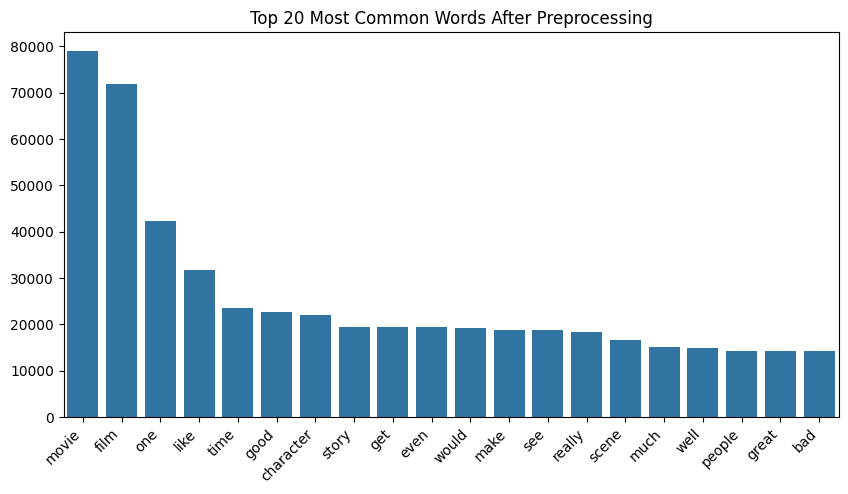

In [6]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop_words
stop_words = set(stopwords.words('english'))

# Define function for cleaning and preprocessing text
def preprocess_text(text):
    """
    Preprocess the text by:
    - Converting to lowercase
    - Removing non-alphabetic characters
    - Tokenizing into words
    - Removing stopwords
    - Lemmatizing words
    """

    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words) if words else "empty_review"

# Splitting data before preprocessing to avoid data leakage
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df['cleaned_reviews'] = train_df['review'].apply(preprocess_text)
test_df['cleaned_reviews'] = test_df['review'].apply(preprocess_text)

# Stopword Removal Verification
common_words = Counter(" ".join(train_df['cleaned_reviews']).split()).most_common(20)
print("Most common words after preprocessing:", common_words)

# Visualize common words after preprocessing
plt.figure(figsize=(10, 5))
sns.barplot(x=[word for word, count in common_words], y=[count for word, count in common_words])
plt.title('Top 20 Most Common Words After Preprocessing')
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
train_df

,review,sentiment,review_length,cleaned_reviews
39087,That's what I kept asking myself during the ma...,negative,2328,thats kept asking many fight screaming match s...
30893,I did not watch the entire movie. I could not ...,negative,1624,watch entire movie could watch entire movie st...
45278,A touching love story reminiscent of In the M...,positive,502,touching love story reminiscent mood love draw...
16398,This latter-day Fulci schlocker is a totally a...,negative,1061,latterday fulci schlocker totally abysmal conc...
13653,"First of all, I firmly believe that Norwegian ...",negative,1760,first firmly believe norwegian movie continual...
...,...,...,...,...
11284,`Shadow Magic' recaptures the joy and amazemen...,positive,427,shadow magic recapture joy amazement first mov...
44732,I found this movie to be quite enjoyable and f...,positive,319,found movie quite enjoyable fairly entertainin...
38158,Avoid this one! It is a terrible movie. So wha...,negative,521,avoid one terrible movie exciting pointless mu...
860,This production was quite a surprise for me. I...,positive,430,production quite surprise absolutely love obsc...


Tokenize

In [8]:
# Tokenizing the text
tokenizer = Tokenizer(num_words=5000)  # We will use the top 5000 words
tokenizer.fit_on_texts(train_df['cleaned_reviews'])

# Convert reviews to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_df['cleaned_reviews'])
test_sequences = tokenizer.texts_to_sequences(test_df['cleaned_reviews'])

# Padding sequences to ensure uniform length
# Select max length dynamically based on 95th percentile of review lengths
max_length = int(np.percentile(train_df['review_length'], 95))
X_train_pad = pad_sequences(train_sequences, padding='post', maxlen=max_length)
X_test_pad = pad_sequences(test_sequences, padding='post', maxlen=max_length)

# Print padded sequence shape
print("Padded sequence shape:", X_train_pad.shape)

Padded sequence shape: (40000, 3388)


## 5. Feature Engineering

Feature engineering transforms our text data into numerical formats suitable for machine learning models.
- We use TF-IDF for traditional ML models to capture the importance of words within the document, and  
- we prepare Word2Vec embeddings for deep learning models to capture semantic similarities.

[18]

In [9]:
#Feature Engineering - TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['cleaned_reviews'])
X_test_tfidf = vectorizer.transform(test_df['cleaned_reviews'])

# Show TF-IDF shape
print("TF-IDF matrix shape:", X_train_tfidf.shape)

# Ensure index consistency before concatenation
train_df = train_df.reset_index(drop=True)
train_tfidf_features = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).reset_index(drop=True)

# Combine features into a DataFrame for traditional ML models
train_features = pd.concat([train_df[['sentiment']], train_tfidf_features, train_df[['review_length']]], axis=1)
print(train_features.head())

# Check for NaNs again after concatenation
print("NaNs in train_features after concatenation:")
print(train_features.isna().sum())

TF-IDF matrix shape: (40000, 5000)
  sentiment  aaron  abandoned  abc   ability  able  absence  absent  absolute  \
0  negative    0.0        0.0  0.0  0.082611   0.0      0.0     0.0       0.0   
1  negative    0.0        0.0  0.0  0.000000   0.0      0.0     0.0       0.0   
2  positive    0.0        0.0  0.0  0.000000   0.0      0.0     0.0       0.0   
3  negative    0.0        0.0  0.0  0.000000   0.0      0.0     0.0       0.0   
4  negative    0.0        0.0  0.0  0.000000   0.0      0.0     0.0       0.0   

   absolutely  ...  younger  youngest  youngster  youre  youth  youve  zero  \
0    0.066110  ...      0.0       0.0        0.0    0.0    0.0    0.0   0.0   
1    0.000000  ...      0.0       0.0        0.0    0.0    0.0    0.0   0.0   
2    0.000000  ...      0.0       0.0        0.0    0.0    0.0    0.0   0.0   
3    0.000000  ...      0.0       0.0        0.0    0.0    0.0    0.0   0.0   
4    0.072843  ...      0.0       0.0        0.0    0.0    0.0    0.0   0.0   

   

## Preparing Word Embeddings Word2Vec

In [10]:
tokenized_sentences = train_df['cleaned_reviews'].apply(lambda x: x.split())
word2vec_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4             # Enables parallel processing
)

def get_sentence_vector(text):
    """
    Convert a sentence to a vector by averaging the word vectors.
    If no words in the sentence match the model's vocabulary, return a zero vector.
    """
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(word_vectors, axis=0) if len(word_vectors) > 0 else np.zeros(word2vec_model.vector_size)

train_word2vec_features = np.array([get_sentence_vector(text) for text in train_df['cleaned_reviews']])
test_word2vec_features = np.array([get_sentence_vector(text) for text in test_df['cleaned_reviews']])

print("Word2Vec sentence vector shape:", train_word2vec_features.shape)

Word2Vec sentence vector shape: (40000, 100)


In [11]:
# Save processed train and test data
train_df.to_csv('processed_imdb_reviews_train.csv', index=False)
test_df.to_csv('processed_imdb_reviews_test.csv', index=False)

# **Traditional Machine Learning**

### **LOGISTIC REGRESSION**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Target variable
y_train = train_df['sentiment']
y_test = test_df['sentiment']

# Train Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', C=1.0)
logreg.fit(X_train_tfidf, y_train)

# Predictions
y_pred = logreg.predict(X_test_tfidf)

# Performance Evaluation
print("\n--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display Sample Predictions with Actual Reviews
sample_results = pd.DataFrame({
    'Review': test_df['review'],  # Use actual reviews
    'Actual Sentiment': y_test,
    'Predicted Sentiment': y_pred
})
print("\nSample Predictions:\n", sample_results.sample(5))



--- Logistic Regression Results ---
Accuracy: 0.8849
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


Sample Predictions:
                                                   Review Actual Sentiment  \
5159   Along with Fernando Fragata, João Mário Grilo,...         positive   
24015  I watch LOTS of bad films, LOTS!!!!!! It's kin...         negative   
18057  "Return of the Jedi" is often remembered for w...         positive   
13263  Would that more romantic comedies were as deft...         positive   
46667  This program would be useful for training hard...         negative   

      Predicted Sentiment  
5159             positive  
24015            negative  
18057            positive 

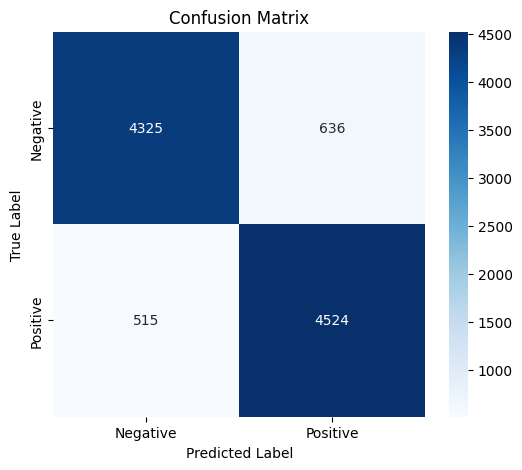

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [14]:
from tabulate import tabulate

# Function to predict sentiment for user-entered reviews
def predict_reviews(model, vectorizer):
    import numpy as np

    # Take user input for three reviews
    reviews = [input(f"Enter review {i+1}: ") for i in range(3)]

    # Transform input reviews using the same vectorizer
    reviews_tfidf = vectorizer.transform(reviews)

    # Predict sentiment
    predictions = model.predict(reviews_tfidf)

    # Make words bold using ANSI escape codes
    bold = lambda text: f"\033[1m{text}\033[0m"

    # Format results with bold text
    results = pd.DataFrame({
        'Review': [bold(review) for review in reviews],
        'Predicted Sentiment': [bold(sentiment) for sentiment in predictions]
    })

    print("\nPredicted Sentiments:\n")
    print(tabulate(results, headers='keys', tablefmt='grid'))

# Example usage
predict_reviews(logreg, vectorizer)


Enter review 1: "Echoes of the Past" isn't terrible, but it's not great either. The plot feels thin, and the characters aren't memorable.
Enter review 2: I didn't hate "Echoes of the Past." Some scenes were genuinely moving, but the pacing was all over the place.
Enter review 3: "Echoes of the Past" isn't what I expected. The cinematography was decent, the story was also great and had all my attention.

Predicted Sentiments:

+----+-------------------------------------------------------------------------------------------------------------------------------+-----------------------+
|    | Review                                                                                                                        | Predicted Sentiment   |
+====+===============================================================================================================================+=======================+
|  0 | "Echoes of the Past" isn't terrible, but it's not great either. The plot feels thin, a

### **NAIVE BAYES**

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Target variable
y_train = train_df['sentiment']
y_test = test_df['sentiment']

# Train Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb_model.predict(X_test_tfidf)

# Performance Evaluation
print("\n--- Naïve Bayes Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display Sample Predictions with Actual Reviews
sample_results = pd.DataFrame({
    'Review': test_df['review'],  # Use actual reviews
    'Actual Sentiment': y_test,
    'Predicted Sentiment': y_pred
})
print("\nSample Predictions:\n", sample_results.sample(5))



--- Naïve Bayes Results ---
Accuracy: 0.8491
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Sample Predictions:
                                                   Review Actual Sentiment  \
2298   I hope the people who made this movies read th...         negative   
47122  Some guy gets whacked. Right out in plain sigh...         negative   
15671  I'm not a big fan of musicals, although this t...         negative   
43915  The English translation of the title on the DV...         negative   
36995  This has to be one of the worst films I have e...         negative   

      Predicted Sentiment  
2298             negative  
47122            negative  
15671            positive  
43915 

# **Deep Learning Model**

# **RNN model**


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Convert sentiment labels to numerical representation
y_train = train_df['sentiment'].map({'positive': 1, 'negative': 0})
y_test = test_df['sentiment'].map({'positive': 1, 'negative': 0})

# Define the RNN Model (without Embedding)
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, input_shape=(train_word2vec_features.shape[1], 1), return_sequences=False))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()

# Reshape input data (RNN expects 3D shape: (samples, timesteps, features))
train_rnn_input = train_word2vec_features.reshape((train_word2vec_features.shape[0], train_word2vec_features.shape[1], 1))
test_rnn_input = test_word2vec_features.reshape((test_word2vec_features.shape[0], test_word2vec_features.shape[1], 1))

# Train the RNN Model
rnn_model.fit(train_rnn_input, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_word2vec = rnn_model.predict(test_rnn_input)
y_pred_labels = (y_pred_word2vec > 0.5).astype(int)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,961 (97.50 KB)

 Trainable params: 24,961 (97.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.6194 - loss: 0.6463 - val_accuracy: 0.7868 - val_loss: 0.4613
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.7751 - loss: 0.4807 - val_accuracy: 0.5795 - val_loss: 0.7650
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.5843 - loss: 0.6697 - val_accuracy: 0.5195 - val_loss: 0.6827
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5188 - loss: 0.6874 - val_accuracy: 0.5268 - val_loss: 0.6828
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5711 - loss: 0.6639 - val_accuracy: 0.5000 - val_loss: 0.6970
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5041 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5041 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.5013 -

In [17]:

# Classification Report (for more detailed error analysis)
print("Classification Report:\n", classification_report(y_test, y_pred_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.66      4961
           1       0.00      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **LSTM model**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(train_word2vec_features.shape[1], 1), return_sequences=False))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# Reshape input data (LSTM expects 3D shape: (samples, timesteps, features))
train_lstm_input = train_word2vec_features.reshape((train_word2vec_features.shape[0], train_word2vec_features.shape[1], 1))
test_lstm_input = test_word2vec_features.reshape((test_word2vec_features.shape[0], test_word2vec_features.shape[1], 1))

# Train the LSTM Model
lstm_model.fit(train_lstm_input, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_lstm = lstm_model.predict(test_lstm_input)
y_pred_labels_lstm = (y_pred_lstm > 0.5).astype(int)





/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,881 (292.50 KB)

 Trainable params: 74,881 (292.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 122s 118ms/step - accuracy: 0.6836 - loss: 0.5989 - val_accuracy: 0.7395 - val_loss: 0.5341
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 143s 120ms/step - accuracy: 0.7498 - loss: 0.5198 - val_accuracy: 0.7778 - val_loss: 0.4646
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 120ms/step - accuracy: 0.7840 - loss: 0.4606 - val_accuracy: 0.8092 - val_loss: 0.4276
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 118s 118ms/step - accuracy: 0.8077 - loss: 0.4235 - val_accuracy: 0.8189 - val_loss: 0.4000
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 122s 122ms/step - accuracy: 0.8229 - loss: 0.4027 - val_accuracy: 0.8265 - val_loss: 0.3983
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 139s 118ms/step - accuracy: 0.8255 - loss: 0.3963 - val_accuracy: 0.8273 - val_loss: 0.3817
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 144s 120ms/step - accuracy: 0.8323 - loss: 0.3901 - val_accuracy: 0.8288 - val_loss: 0.3780
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 120ms/step - ac

In [19]:

# Classification Report (for more detailed error analysis)
print("Classification Report:\n", classification_report(y_test, y_pred_labels_lstm))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      4961
           1       0.82      0.87      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# **GRU model**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Define the GRU Model (without Embedding)
gru_model = Sequential()
gru_model.add(GRU(128, input_shape=(train_word2vec_features.shape[1], 1), return_sequences=False))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.summary()

# Reshape input data (GRU expects 3D shape: (samples, timesteps, features))
train_gru_input = train_word2vec_features.reshape((train_word2vec_features.shape[0], train_word2vec_features.shape[1], 1))
test_gru_input = test_word2vec_features.reshape((test_word2vec_features.shape[0], test_word2vec_features.shape[1], 1))

# Train the GRU Model
gru_history = gru_model.fit(
    train_gru_input,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1  # Shows progress
)

# Make predictions
y_pred_gru = gru_model.predict(test_gru_input)
y_pred_labels_gru = (y_pred_gru > 0.5).astype(int)

# Evaluate models (ensure all inputs have the correct shape)
rnn_loss, rnn_acc = rnn_model.evaluate(test_word2vec_features.reshape(test_word2vec_features.shape[0], test_word2vec_features.shape[1], 1), y_test)
lstm_loss, lstm_acc = lstm_model.evaluate(test_lstm_input, y_test)
gru_loss, gru_acc = gru_model.evaluate(test_gru_input, y_test)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 128)                 │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,625 (229.00 KB)

 Trainable params: 58,625 (229.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 110s 107ms/step - accuracy: 0.6718 - loss: 0.6051 - val_accuracy: 0.7501 - val_loss: 0.5152
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 144s 109ms/step - accuracy: 0.7479 - loss: 0.5179 - val_accuracy: 0.7861 - val_loss: 0.4585
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 107s 107ms/step - accuracy: 0.7927 - loss: 0.4519 - val_accuracy: 0.8048 - val_loss: 0.4370
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 144s 109ms/step - accuracy: 0.8014 - loss: 0.4333 - val_accuracy: 0.8175 - val_loss: 0.4046
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 106s 106ms/step - accuracy: 0.8173 - loss: 0.4150 - val_accuracy: 0.8180 - val_loss: 0.4136
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 138s 102ms/step - accuracy: 0.8154 - loss: 0.4113 - val_accuracy: 0.8300 - val_loss: 0.3862
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 148s 109ms/step - accuracy: 0.8224 - loss: 0.4006 - val_accuracy: 0.8360 - val_loss: 0.3744
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 140s 107ms/step - ac

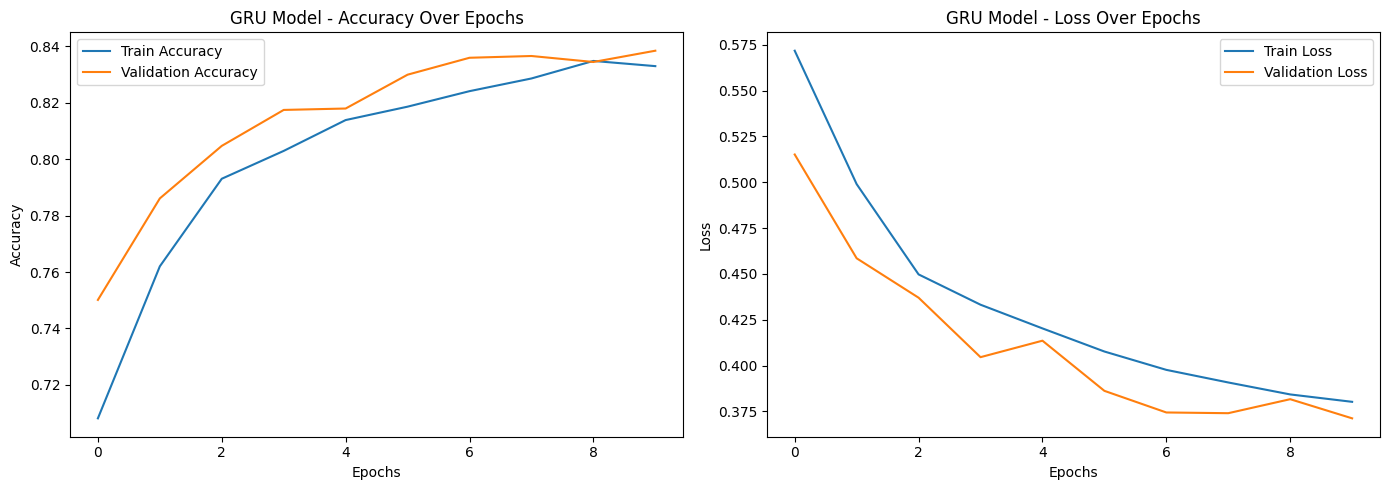

In [27]:
# Plotting Accuracy & Loss Curves
def plot_gru_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('GRU Model - Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('GRU Model - Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display the plots
plot_gru_history(gru_history)


In [28]:

# Classification Report (for more detailed error analysis)
print("Classification Report:\n", classification_report(y_test, y_pred_labels_gru))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      4961
           1       0.85      0.82      0.83      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [30]:
print(f'GRU Model Accuracy: {gru_acc}')

GRU Model Accuracy: 0.8366000056266785


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      4961
           1       0.82      0.87      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



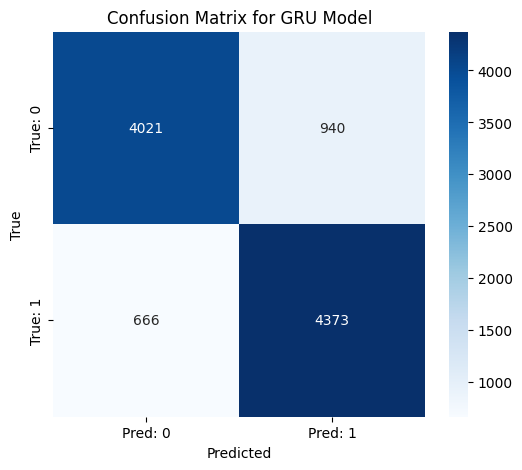

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix of the most accurate
conf_matrix = confusion_matrix(y_test, y_pred_labels_lstm)

# Classification Report (for more detailed error analysis)
print("Classification Report:\n", classification_report(y_test, y_pred_labels_lstm))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix for GRU Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# Sample Predictions
sample_indices = sample_results.sample(5).index

# Add GRU Predictions
sample_results['GRU Predicted Sentiment'] = y_pred_labels_gru.flatten()

# Display Sample Predictions
sample_analysis = sample_results.loc[sample_indices, ['Review', 'Actual Sentiment', 'Predicted Sentiment', 'GRU Predicted Sentiment']]
print("\nSample Predictions Comparison:\n", sample_analysis)



Sample Predictions Comparison:
                                                   Review Actual Sentiment  \
6217   So this ugly guy with long, nasty hair and his...         negative   
5382   Wow! A Danish movie with this kind of content?...         positive   
46734  OK, imagine that every state in the US, nay, e...         negative   
14595  "Gespenster" Question of to be cool in the Ger...         positive   
10311  The tighter the drama, the better the film of ...         positive   

      Predicted Sentiment  GRU Predicted Sentiment  
6217             negative                        0  
5382             negative                        0  
46734            positive                        1  
14595            positive                        1  
10311            positive                        1  
